In [19]:
# csv file path
file_path = './resume_shortlist.csv'
# pandas to handle the dataset
import pandas as pd

In [20]:
# read the dataset and map all non-numeric values to numeric. As the system can only understand numerics
ds = pd.read_csv(file_path)
degree = { 'BTech':0, 'MTech':1 }
yes_no = { 'N':0, 'Y':1 }
ds['Degree'] = ds['Degree'].map(degree)
ds['Referral'] = ds['Referral'].map(yes_no)
ds['Shortlisted'] = ds['Shortlisted'].map(yes_no)
ds.head()

,Degree,Grade,Work Experience,Referral,Shortlisted
0,0,50,4,0,0
1,1,40,4,0,0
2,1,95,5,0,1
3,0,80,4,0,1
4,1,60,5,0,1


In [21]:
# another most popular library to implement ML algos - scikit learn
from sklearn import tree
features = ds[ds.columns[:-1]] # prepare the input features
output = ds['Shortlisted'] # output vector
model = tree.DecisionTreeClassifier() # create Decission tree model
model.fit(features, output) # train the model
model.predict([[0, 82, 0, 0]]) # new unknown feature

array([0], dtype=int64)

Init signature: tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int, float, optional (default=2)
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a percentage and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

    .. versionchanged:: 0.18
       Added float values for percentages.

min_samples_leaf : int, float, optional (default=1)
    The minimum number of samples required to be at a leaf node:

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a percentage and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

    .. versionchanged:: 0.18
       Added float values for percentages.

min_weight_fraction_leaf : float, optional (default=0.)
    The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.

max_features : int, float, string or None, optional (default=None)
    The number of features to consider when looking for the best split:

        - If int, then consider `max_features` features at each split.
        - If float, then `max_features` is a percentage and
          `int(max_features * n_features)` features are considered at each
          split.
        - If "auto", then `max_features=sqrt(n_features)`.
        - If "sqrt", then `max_features=sqrt(n_features)`.
        - If "log2", then `max_features=log2(n_features)`.
        - If None, then `max_features=n_features`.

    Note: the search for a split does not stop until at least one
    valid partition of the node samples is found, even if it requires to
    effectively inspect more than ``max_features`` features.

random_state : int, RandomState instance or None, optional (default=None)
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used
    by `np.random`.

max_leaf_nodes : int or None, optional (default=None)
    Grow a tree with ``max_leaf_nodes`` in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.

min_impurity_decrease : float, optional (default=0.)
    A node will be split if this split induces a decrease of the impurity
    greater than or equal to this value.

    The weighted impurity decrease equation is the following::

        N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)

    where ``N`` is the total number of samples, ``N_t`` is the number of
    samples at the current node, ``N_t_L`` is the number of samples in the
    left child, and ``N_t_R`` is the number of samples in the right child.

    ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
    if ``sample_weight`` is passed.

    .. versionadded:: 0.19

min_impurity_split : float,
    Threshold for early stopping in tree growth. A node will split
    if its impurity is above the threshold, otherwise it is a leaf.

    .. deprecated:: 0.19
       ``min_impurity_split`` has been deprecated in favor of
       ``min_impurity_decrease`` in 0.19 and will be removed in 0.21.
       Use ``min_impurity_decrease`` instead.

class_weight : dict, list of dicts, "balanced" or None, default=None
    Weights associated with classes in the form ``{class_label: weight}``.
    If not given, all classes are supposed to have weight one. For
    multi-output problems, a list of dicts can be provided in the same
    order as the columns of y.

    Note that for multioutput (including multilabel) weights should be
    defined for each class of every column in its own dict. For example,
    for four-class multilabel classification weights should be
    [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of
    [{1:1}, {2:5}, {3:1}, {4:1}].

    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``

    For multi-output, the weights of each column of y will be multiplied.

    Note that these weights will be multiplied with sample_weight (passed
    through the fit method) if sample_weight is specified.

presort : bool, optional (default=False)
    Whether to presort the data to speed up the finding of best splits in
    fitting. For the default settings of a decision tree on large
    datasets, setting this to true may slow down the training process.
    When using either a smaller dataset or a restricted depth, this may
    speed up the training.

In [22]:
# dot graphihcal representation of the decision tree
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO() #in-memory buffer
tree.export_graphviz(model, out_file=dot_data, feature_names=list(ds.columns[:-1]))  

# create graph from the dotted data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Signature: tree.export_graphviz(decision_tree, out_file="tree.dot", max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3) Docstring: Export a decision tree in DOT format.

This function generates a GraphViz representation of the decision tree, which is then written into out_file. Once exported, graphical renderings can be generated using png

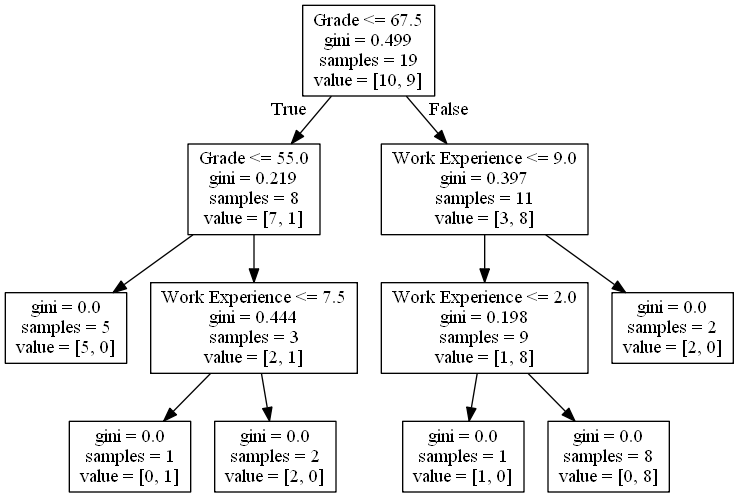

In [23]:
# draw the image
from IPython.display import Image
Image(graph.create_png())